In [ ]:
!python -m pip install git+https://github.com/greydanus/mnist1d.git@master

!git clone https://github.com/greydanus/mnist1d

  Cloning https://github.com/greydanus/mnist1d.git (to revision master) to /tmp/pip-req-build-nzon7p_4
  Running command git clone --filter=blob:none --quiet https://github.com/greydanus/mnist1d.git /tmp/pip-req-build-nzon7p_4
  Resolved https://github.com/greydanus/mnist1d.git to commit 7878d96082abd200c546a07a4101fa90b30fdf7e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mnist1d: filename=mnist1d-0.0.2.post16-py3-none-any.whl size=14624 sha256=3d9de1cd95bb3c693b20135cddb327eb6dd1a56b5ad5c21b367840c9bbfd3ccc
  Stored in directory: /tmp/pip-ephem-wheel-cache-5e41k_ms/wheels/d7/f4/df/433336ddc98ff899ac4db5b8c4230819d9c130d002cc400cd8
Successfully built mnist1d
Cloning into 'mnist1d'...
remote: Enumerating objects: 541, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 541 (delta 120), reused 119 (delta 119), pack-

# Visualizing the MNIST and MNIST-1D datasets with t-SNE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy.ndimage import gaussian_filter
import torch.optim as optim
import matplotlib.pylab as pl
import torch, os,time
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import mnist1d

In [ ]:
!pip install opentsne

from openTSNE import TSNE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 45.0 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

import pylab as plt
import numpy as np



In [ ]:
# Load MNIST

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
X_2d = mnist.data.values
y_2d = mnist.target.values.astype('int')

print(X_2d.shape)

(70000, 784)


In [ ]:
Z_2d = TSNE(n_jobs=-1, verbose=True).fit(X_2d)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=-1, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 172.13 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 3.72 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 1.41 seconds
===> Running optimization with exaggeration=12.00, lr=5833.33 for 250 iterations...
Iteration   50, KL divergence 5.9916, 50 iterations in 8.0375 sec
Iteration  100, KL divergence 5.8291, 50 iterations in 6.6488 sec
Iteration  150, KL divergence 5.7808, 50 iterations in 8.0142 sec
Iteration  200, KL divergence 5.7639, 50 iterations in 7.5805 sec
Iteration  250, KL divergence 5.7550, 50 iterations in 6.9123 sec
   --> Time elapsed: 37.20 seconds
===> Running optimization with exaggeration=1.00, lr=70000

In [ ]:

import pickle

with open('/content/mnist1d/mnist1d_data.pkl', 'rb') as f:
    mnist1d = pickle.load(f)

X_1d = np.concatenate((mnist1d['x'], mnist1d['x_test']))
y_1d = np.concatenate((mnist1d['y'], mnist1d['y_test']))

print(X_1d.shape)

(5000, 40)


In [ ]:
Z_1d = TSNE(n_jobs=-1, verbose=True).fit(X_1d)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=-1, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 2.03 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.14 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=416.67 for 250 iterations...
Iteration   50, KL divergence 4.8843, 50 iterations in 35.2547 sec
Iteration  100, KL divergence 4.8347, 50 iterations in 26.7448 sec
Iteration  150, KL divergence 4.8354, 50 iterations in 22.2705 sec
Iteration  200, KL divergence 4.8355, 50 iterations in 23.8634 sec
Iteration  250, KL divergence 4.8354, 50 iterations in 24.0555 sec
   --> Time elapsed: 132.19 seconds
===> Running optimization with exaggeration=1.00, lr=50

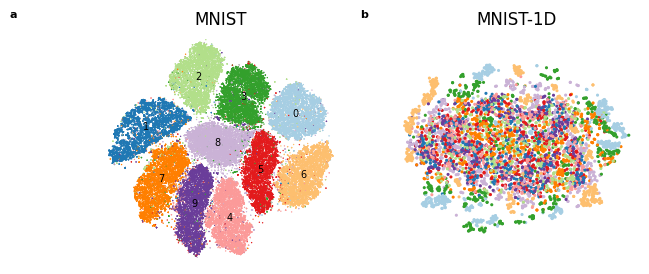

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define nice colors
col = np.array(['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
                '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a'])

fig, axs = plt.subplots(ncols=2, figsize=(7, 3))

# Plot for 2D
axs[0].axis('equal')
axs[0].scatter(Z_2d[:,0], Z_2d[:,1], c=col[y_2d], s=1, edgecolors='none', rasterized=True)
axs[0].set_title('MNIST')
axs[0].axis('off')

for k in range(10):
    mu = np.median(Z_2d[y_2d == k, :], axis=0)
    axs[0].text(mu[0], mu[1], str(k), ha='center', va='center', fontsize=7)

# Plot for 1D
axs[1].axis('equal')
axs[1].scatter(Z_1d[:,0], Z_1d[:,1], c=col[y_1d], s=5, edgecolors='none', rasterized=True)
axs[1].set_title('MNIST-1D')
axs[1].axis('off')

fig.text(0, .93, 'a', fontsize=8, weight='bold')
fig.text(.5, .93, 'b', fontsize=8, weight='bold')

plt.show()


It can be see in the above concatenated images the distribution of data for both Original MNIST and MNIST1D, for MNIST it looks quite structered, but for MNIS1D it is an example or good scatter plot.


# Finding lottery ticket in an MLP classifier trained on MNIST1D

In [ ]:
from mnist1d.data import get_dataset, get_dataset_args
from mnist1d.utils import set_seed, to_pickle, from_pickle

import sys ; sys.path.append('./mnist1d/notebooks')
from train import get_model_args, train_model

In [ ]:
args = get_dataset_args()
data = get_dataset(args=args)

print("Examples in training set: {}".format(len(data['y'])))
print("Examples in test set: {}".format(len(data['y_test'])))
print("Length of each input: {}".format(data['x'].shape[-1]))
print("Number of classes: {}".format(len(data['templates']['y'])))

Saving to ./mnist1d_data.pkl
Successfully loaded data from ./mnist1d_data.pkl
Examples in training set: 4000
Examples in test set: 1000
Length of each input: 40
Number of classes: 10


In [ ]:
class SparseLinear(torch.nn.Module):
  def __init__(self, x_size, y_size):
    super(SparseLinear, self).__init__()
    self.linear = torch.nn.Linear(x_size, y_size)
    param_vec = torch.cat([p.flatten() for p in self.parameters()])
    self.mask = torch.ones_like(param_vec)

  def forward(self, x, apply_mask=True):
    if apply_mask:
      self.apply_mask()
    return self.linear(x)

  def update_mask(self, new_mask):
    self.mask = new_mask
    self.apply_mask()

  def apply_mask(self):
    self.vec2param(self.param2vec())

  def param2vec(self):
    vec = torch.cat([p.flatten() for p in self.parameters()])
    return self.mask * vec

  def vec2param(self, vec):
    pointer = 0
    for param in self.parameters():
      param_len = np.cumprod(param.shape)[-1]
      new_param = vec[pointer:pointer+param_len].reshape(param.shape)
      param.data = new_param.data
      pointer += param_len

class SparseMLP(torch.nn.Module):
  def __init__(self, input_size, output_size, hidden_size=100):
    super(SparseMLP, self).__init__()
    self.linear1 = SparseLinear(input_size, hidden_size)
    self.linear2 = SparseLinear(hidden_size, hidden_size)
    self.linear3 = SparseLinear(hidden_size, output_size)
    self.layers = [self.linear1, self.linear2, self.linear3]

  def forward(self, x):
    h = torch.relu(self.linear1(x))
    h = h + torch.relu(self.linear2(h))
    h = self.linear3(h)
    return h

  def get_layer_masks(self):
    return [l.mask for l in self.layers]

  def set_layer_masks(self, new_masks):
    for i, l in enumerate(self.layers):
      l.update_mask(new_masks[i])

  def get_layer_vecs(self):
    return [l.param2vec() for l in self.layers]

  def set_layer_vecs(self, vecs):
    for i, l in enumerate(self.layers):
      l.vec2param(vecs[i])

In [ ]:
def get_mask(scores, percent_sparse):

    # Calculate the number of weights to drop
    num_to_drop = int(percent_sparse * scores.numel())

    # Get the indices of weights with the lowest scores
    ixs_to_drop = torch.argsort(scores)[:num_to_drop]  # Sort by score, select lowest `num_to_drop` scores

    # Initialize the mask with ones (retain all initially)
    mask = torch.ones_like(scores)

    # Set indices of lowest-scored weights to 0
    mask[ixs_to_drop] = 0

    return mask


In [ ]:
def find_lottery_ticket(model, dataset, args, sparsity_schedule, criteria_fn=None,
                        prune_print_every=None, **kwargs):
  if prune_print_every is None:
    prune_print_every = np.inf

  if criteria_fn is None:
    print("Using default magnitude-based pruning")
    criteria_fn = lambda init_params, final_params: final_params.abs()

  init_params = model.get_layer_vecs()
  stats = {'train_losses':[], 'test_losses':[], 'train_accs':[], 'test_accs':[]}
  models = []
  for i, percent_sparse in enumerate(sparsity_schedule):

    # layer-wise pruning, where pruning heuristic is determined by criteria_fn
    final_params = model.get_layer_vecs()
    scores = [criteria_fn(ip, fp) for ip, fp in zip(init_params, final_params)]
    masks = [get_mask(s, percent_sparse) for s in scores]

    # update model with mask and init parameters
    model.set_layer_vecs(init_params)
    model.set_layer_masks(masks)

    # training process
    results = train_model(dataset, model, args)
    model = results['checkpoints'][-1]

    # store stats
    stats['train_losses'].append(results['train_losses'])
    stats['test_losses'].append(results['test_losses'])
    stats['train_accs'].append(results['train_acc'])
    stats['test_accs'].append(results['test_acc'])

    # print progress
    if (i+1) % prune_print_every == 0:
      print('\tretrain #{}, sparsity {:.2f}, final_train_loss {:.3e}, max_acc {:.1f}, last_acc {:.1f}, mean_acc {:.1f}'
            .format(i+1, percent_sparse, results['train_losses'][-1], np.max(results['test_acc']),
            results['test_acc'][-1], np.mean(results['test_acc']) ))
      models.append(copy.deepcopy(model))

  stats = {k: np.stack(v) for k, v in stats.items()}
  return models, stats

In [ ]:
# train settings
model_args = get_model_args()
model_args.total_steps = 1501
model_args.hidden_size = 500
model_args.print_every = 5000
model_args.eval_every = 100
model_args.learning_rate = 2e-2


# sparsity settings
num_retrains = 100
sparsity_schedule = np.linspace(0,1.,num_retrains)

# Finding the lottery ticket and random ticket

In [ ]:
num_trials = 2
trials = {'rand_models': [], 'rand_stats': [], 'lott_models': [], 'lott_stats': []}
for t in range(num_trials):
  print("############  Trial {}  ############".format(t))
  print("   Random pruning")
  set_seed(model_args.seed+t)
  model = SparseMLP(model_args.input_size, model_args.output_size, hidden_size=model_args.hidden_size)

  def criteria_fn(init_params, final_params):
    mask = (final_params == 0).int()  # if params are already set to zero, keep them set to zero
    return torch.rand(final_params.shape) #* mask
  models, stats = find_lottery_ticket(model, data, model_args, sparsity_schedule,
                                      criteria_fn=criteria_fn, prune_print_every=1)
  trials['rand_models'].append(models)
  trials['rand_stats'].append(stats)

  print("   Magnitude pruning")
  set_seed(model_args.seed+t)
  model = SparseMLP(model_args.input_size, model_args.output_size, hidden_size=model_args.hidden_size)
  criteria_fn = lambda init_params, final_params: final_params.abs()
  models, stats = find_lottery_ticket(model, data, model_args, sparsity_schedule,
                  criteria_fn=criteria_fn, prune_print_every=1)
  trials['lott_models'].append(models)
  trials['lott_stats'].append(stats)

############  Trial 0  ############
   Random pruning
	retrain #1, sparsity 0.00, final_train_loss 1.438e-01, max_acc 65.9, last_acc 64.9, mean_acc 57.9
	retrain #2, sparsity 0.01, final_train_loss 3.068e-01, max_acc 65.5, last_acc 65.1, mean_acc 58.3
	retrain #3, sparsity 0.02, final_train_loss 1.078e-01, max_acc 64.4, last_acc 64.4, mean_acc 57.4
	retrain #4, sparsity 0.03, final_train_loss 2.856e-01, max_acc 65.3, last_acc 64.9, mean_acc 58.0
	retrain #5, sparsity 0.04, final_train_loss 1.653e-01, max_acc 65.2, last_acc 63.6, mean_acc 57.5
	retrain #6, sparsity 0.05, final_train_loss 1.867e-01, max_acc 65.9, last_acc 64.8, mean_acc 57.6
	retrain #7, sparsity 0.06, final_train_loss 1.031e-01, max_acc 65.5, last_acc 64.9, mean_acc 57.9
	retrain #8, sparsity 0.07, final_train_loss 1.311e-01, max_acc 65.3, last_acc 64.9, mean_acc 58.1
	retrain #9, sparsity 0.08, final_train_loss 1.149e-01, max_acc 67.1, last_acc 67.1, mean_acc 58.3
	retrain #10, sparsity 0.09, final_train_loss 1.367e-01

Since i  am in colab, I really don't wanna run that again and again so i am saving that trials to a file lottery.pkl and can can load directly from it.

In [ ]:
to_pickle(trials, path='/content/lottery.pkl')

In [ ]:
trials = from_pickle('/content/lottery.pkl')

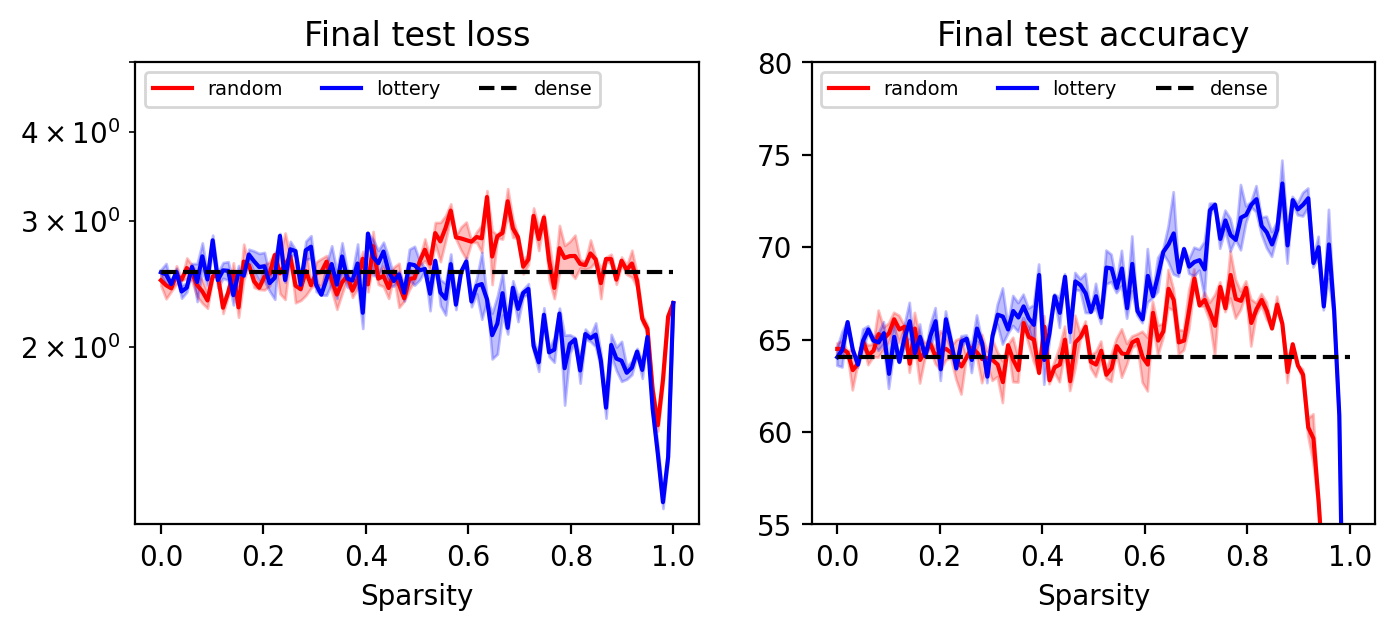

In [ ]:
def average_over(trials, trial_name, key):
    ys = [trials[trial_name][i][key] for i in range(len(trials[trial_name]))]
    return np.stack(ys).mean(0), np.stack(ys).std(0) / np.sqrt(len(ys))
x = sparsity_schedule
# Define colors and figure
rand_color, lott_color = 'r', 'b'
fig = plt.figure(figsize=[8, 3], dpi=200)

# Plotting Final Test Loss
plt.subplot(1, 2, 1)
for trial_name, color, label in zip(['rand_stats', 'lott_stats'], [rand_color, lott_color], ['random', 'lottery']):
    y, y_err = average_over(trials, trial_name, 'test_losses')
    y, y_err = y[:, -1], y_err[:, -1]
    plt.plot(x, y, '-', color=color, label=label)
    plt.fill_between(x, y - y_err, y + y_err, color=color, alpha=0.25)

plt.plot(x, np.ones_like(x) * y[0], 'k--', label='dense')
plt.xlabel('Sparsity')
plt.title('Final test loss')
plt.yscale('log')
plt.ylim(None, 5e0)
plt.legend(fontsize=7, ncol=3, loc='upper left')

# Plotting Final Test Accuracy
plt.subplot(1, 2, 2)
for trial_name, color, label in zip(['rand_stats', 'lott_stats'], [rand_color, lott_color], ['random', 'lottery']):
    y, y_err = average_over(trials, trial_name, 'test_accs')
    y, y_err = y[:, -1], y_err[:, -1]
    plt.plot(x, y, '-', color=color, label=label)
    plt.fill_between(x, y - y_err, y + y_err, color=color, alpha=0.25)

plt.plot(x, np.ones_like(x) * y[0], 'k--', label='dense')
plt.xlabel('Sparsity')
plt.title('Final test accuracy')
plt.ylim(55, 80)
plt.legend(fontsize=7, ncol=3, loc='upper left')

plt.show()

It can be seen that loss graph of sub network (lottery ticket) is decreasing at faster rate that the original network and accuracy is is higher for that sub network

#  Creating new datasets from the same distribution and evaluating lottery tickets
This test will ensure rigourous training and  essential for understanding their robustness and generalization capabilities.

In [ ]:
args = get_dataset_args()
args.seed = args.seed + 1  # new manual seed -> new dataset from same dataset
data = get_dataset(args=args, download=False, regenerate=True)

print("Examples in training set: {}".format(len(data['y'])))
print("Examples in test set: {}".format(len(data['y_test'])))
print("Length of each input: {}".format(data['x'].shape[-1]))
print("Number of classes: {}".format(len(data['templates']['y'])))

Did or could not load data from ./mnist1d_data.pkl. Rebuilding dataset...
Examples in training set: 4000
Examples in test set: 1000
Length of each input: 40
Number of classes: 10


In [ ]:
retrain_step = 91

# Model arguments configuration
model_args = get_model_args()
model_args.hidden_size = 500
model_args.eval_every = 100
model_args.learning_rate = 2e-2
model_args.total_steps = 6000
model_args.print_every = 1000
model_args.batch_size = 500  # Higher batch size to demonstrate overfitting

results = {'dense': [], 'lott': [], 'rand': []}

# Training loop for each trial
for t in range(len(trials['rand_stats'])):
    print("\n############  Trial {}  ############".format(t))
    set_seed(model_args.seed + t)

    # Initialize models
    dense_model = SparseMLP(model_args.input_size, model_args.output_size, hidden_size=model_args.hidden_size)
    _rand_model = copy.deepcopy(trials['rand_models'][t][retrain_step])
    _lott_model = copy.deepcopy(trials['lott_models'][t][retrain_step])

    # Prepare random and lottery ticket models
    rand_model = copy.deepcopy(dense_model)
    rand_model.set_layer_masks(_rand_model.get_layer_masks())

    lott_model = copy.deepcopy(dense_model)
    lott_model.set_layer_masks(_lott_model.get_layer_masks())

    # Train models and store results
    results['dense'].append(train_model(data, dense_model, model_args))
    results['lott'].append(train_model(data, lott_model, model_args))
    results['rand'].append(train_model(data, rand_model, model_args))


############  Trial 0  ############
step 1000, dt 22.36s, train_loss 1.416e-03, test_loss 1.953e+00, train_acc 100.0, test_acc 65.6
step 2000, dt 24.45s, train_loss 4.011e-04, test_loss 2.220e+00, train_acc 100.0, test_acc 65.2
step 3000, dt 24.55s, train_loss 1.675e-04, test_loss 2.415e+00, train_acc 100.0, test_acc 64.8
step 4000, dt 24.78s, train_loss 8.116e-05, test_loss 2.579e+00, train_acc 100.0, test_acc 64.4
step 5000, dt 24.88s, train_loss 4.228e-05, test_loss 2.728e+00, train_acc 100.0, test_acc 64.6
step 6000, dt 26.21s, train_loss 2.291e-05, test_loss 2.868e+00, train_acc 100.0, test_acc 64.4
step 1000, dt 26.34s, train_loss 4.881e-03, test_loss 1.879e+00, train_acc 100.0, test_acc 68.9
step 2000, dt 31.34s, train_loss 8.133e-04, test_loss 2.353e+00, train_acc 100.0, test_acc 68.7
step 3000, dt 33.60s, train_loss 2.802e-04, test_loss 2.636e+00, train_acc 100.0, test_acc 68.8
step 4000, dt 33.90s, train_loss 1.223e-04, test_loss 2.862e+00, train_acc 100.0, test_acc 68.9
ste

In [ ]:
to_pickle(results, path='/content/results.pkl')

In [ ]:
results = from_pickle('/content/results.pkl')

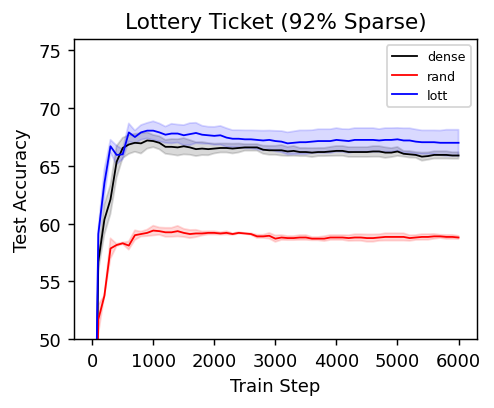

In [ ]:
def average_over_results(results, name):
    ys = [results[name][t]['test_acc'] for t in range(len(results[name]))]
    return np.mean(ys, axis=0), np.std(ys, axis=0) / np.sqrt(len(ys))

# Prepare the plot
fig = plt.figure(figsize=(4, 3), dpi=130)
x = range(0, model_args.total_steps + 1, model_args.eval_every)

# Plot results for each model type
for color, label in zip(['k', 'r', 'b'], ['dense', 'rand', 'lott']):
    y, y_err = average_over_results(results, label)
    plt.plot(x, y, color=color, label=label,linewidth = 1)
    plt.fill_between(x, y - y_err, y + y_err, color=color, alpha=0.15)

# Final plot settings
plt.title('Lottery Ticket ({:.0f}% Sparse)'.format(100 * sparsity_schedule[retrain_step]))
plt.ylabel('Test Accuracy')
plt.xlabel("Train Step")
plt.ylim(50, 76)
plt.legend(fontsize=7)

# Show the plot
plt.show()

# Let's see how shuffling effects the Accuracy

In [ ]:
data_shuff = {}
np.random.seed(0)
shuffle_ixs = np.random.permutation(40) #np.array(range(32)) #
for k in data.keys():
  if k in ['x', 'x_test', 'steps']:
    data_shuff[k] = data[k][...,shuffle_ixs].copy() # shuffle sequence
  else:
    data_shuff[k] = data[k].copy()

In [ ]:
results_shuff = {'dense': [], 'lott': [], 'rand': []}
for t in range(len(trials['rand_stats'])):
  print("\n############  Trial {}  ############".format(t))
  set_seed(model_args.seed + t)
  dense_model = SparseMLP(model_args.input_size, model_args.output_size, \
                          hidden_size=model_args.hidden_size)
  _rand_model = copy.deepcopy(trials['rand_models'][t][retrain_step])
  _lott_model = copy.deepcopy(trials['lott_models'][t][retrain_step])

  rand_model = copy.deepcopy(dense_model)
  rand_model.set_layer_masks(_rand_model.get_layer_masks())

  lott_model = copy.deepcopy(dense_model)
  lott_model.set_layer_masks(_lott_model.get_layer_masks())

  dense = train_model(data_shuff, dense_model, model_args) ; results_shuff['dense'].append(dense)
  lott = train_model(data_shuff, lott_model, model_args)   ; results_shuff['lott'].append(lott)
  rand = train_model(data_shuff, rand_model, model_args)   ; results_shuff['rand'].append(rand)


############  Trial 0  ############
step 1000, dt 21.33s, train_loss 1.744e-03, test_loss 1.856e+00, train_acc 100.0, test_acc 64.3
step 2000, dt 23.74s, train_loss 4.893e-04, test_loss 2.109e+00, train_acc 100.0, test_acc 65.2
step 3000, dt 24.15s, train_loss 2.051e-04, test_loss 2.299e+00, train_acc 100.0, test_acc 65.7
step 4000, dt 25.38s, train_loss 1.004e-04, test_loss 2.461e+00, train_acc 100.0, test_acc 65.9
step 5000, dt 24.52s, train_loss 5.283e-05, test_loss 2.605e+00, train_acc 100.0, test_acc 65.8
step 6000, dt 24.52s, train_loss 2.886e-05, test_loss 2.744e+00, train_acc 100.0, test_acc 65.5
step 1000, dt 25.63s, train_loss 5.346e-03, test_loss 2.441e+00, train_acc 100.0, test_acc 61.1
step 2000, dt 32.37s, train_loss 8.901e-04, test_loss 3.103e+00, train_acc 100.0, test_acc 60.3
step 3000, dt 33.41s, train_loss 3.049e-04, test_loss 3.497e+00, train_acc 100.0, test_acc 60.1
step 4000, dt 35.18s, train_loss 1.327e-04, test_loss 3.801e+00, train_acc 100.0, test_acc 60.2
ste

In [ ]:
to_pickle(results_shuff, path='/content/results_shuff.pkl')

In [ ]:
results_shuff = from_pickle('/content/results_shuff.pkl')

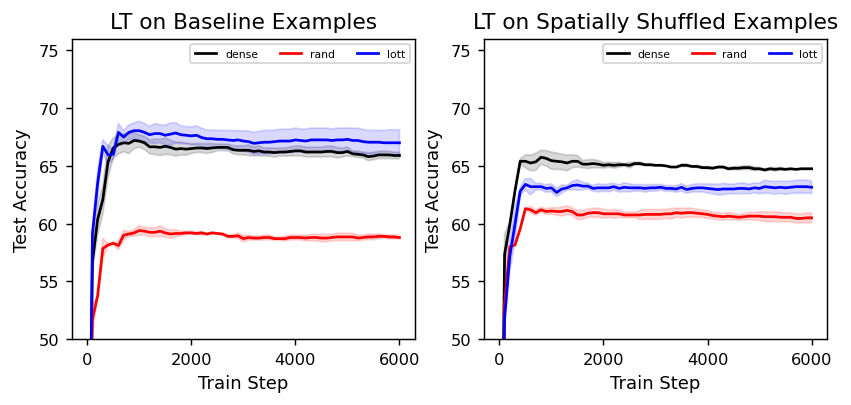

In [ ]:
import matplotlib.pyplot as plt

# Prepare the figure
fig = plt.figure(figsize=(7.5, 3), dpi=130)
x = range(0, model_args.total_steps + 1, model_args.eval_every)

# Plot for baseline examples
plt.subplot(1, 2, 1)
plt.title('LT on Baseline Examples')
for color, label in zip(['k', 'r', 'b'], ['dense', 'rand', 'lott']):
    y, y_err = average_over_results(results, label)
    plt.plot(x, y, color=color, label=label)
    plt.fill_between(x, y - y_err, y + y_err, color=color, alpha=0.15)

plt.ylim(50, 76)
plt.ylabel('Test Accuracy')
plt.xlabel("Train Step")
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(fontsize=6, ncol=3)

# Plot for spatially shuffled examples
plt.subplot(1, 2, 2)
plt.title('LT on Spatially Shuffled Examples')
for color, label in zip(['k', 'r', 'b'], ['dense', 'rand', 'lott']):
    y, y_err = average_over_results(results_shuff, label)
    plt.plot(x, y, color=color, label=label)
    plt.fill_between(x, y - y_err, y + y_err, color=color, alpha=0.15)

plt.ylim(50, 76)
plt.ylabel('Test Accuracy')
plt.xlabel("Train Step")
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(fontsize=6, ncol=3)

# Show the plot
plt.show()

Isn't it crazy that, on original dataset lottert ticket performed best, but when shuffled spatially dataset is used original network performed best, that means altering data spatially.

# What if we flip the dataset

In [ ]:
data_flip = {}
for k in data.keys():
  if k in ['x', 'x_test', 'steps']:
    data_flip[k] = data[k][...,::-1].copy()
  else:
    data_flip[k] = data[k].copy()

In [ ]:
results_flip = {'dense': [], 'lott': [], 'rand': []}

for t in range(len(trials['rand_stats'])):
    print("\n############  Trial {}  ############".format(t))
    set_seed(model_args.seed + t)
    dense_model = SparseMLP(model_args.input_size, model_args.output_size, hidden_size=model_args.hidden_size)
    rand_model = copy.deepcopy(dense_model)
    rand_model.set_layer_masks(trials['rand_models'][t][retrain_step].get_layer_masks())

    lott_model = copy.deepcopy(dense_model)
    lott_model.set_layer_masks(trials['lott_models'][t][retrain_step].get_layer_masks())
    results_flip['dense'].append(train_model(data_flip, dense_model, model_args))
    results_flip['lott'].append(train_model(data_flip, lott_model, model_args))
    results_flip['rand'].append(train_model(data_flip, rand_model, model_args))


############  Trial 0  ############
step 1000, dt 22.28s, train_loss 9.980e-04, test_loss 2.193e+00, train_acc 100.0, test_acc 63.3
step 2000, dt 24.67s, train_loss 2.490e-04, test_loss 2.530e+00, train_acc 100.0, test_acc 63.4
step 3000, dt 25.81s, train_loss 9.821e-05, test_loss 2.772e+00, train_acc 100.0, test_acc 64.0
step 4000, dt 25.12s, train_loss 4.589e-05, test_loss 2.967e+00, train_acc 100.0, test_acc 64.5
step 5000, dt 24.98s, train_loss 2.348e-05, test_loss 3.142e+00, train_acc 100.0, test_acc 64.3
step 6000, dt 25.06s, train_loss 1.253e-05, test_loss 3.304e+00, train_acc 100.0, test_acc 64.0
step 1000, dt 25.49s, train_loss 5.360e-03, test_loss 2.314e+00, train_acc 100.0, test_acc 63.5
step 2000, dt 31.42s, train_loss 9.539e-04, test_loss 2.917e+00, train_acc 100.0, test_acc 63.1
step 3000, dt 32.98s, train_loss 3.372e-04, test_loss 3.289e+00, train_acc 100.0, test_acc 63.1
step 4000, dt 33.30s, train_loss 1.480e-04, test_loss 3.581e+00, train_acc 100.0, test_acc 62.6
ste

In [ ]:
to_pickle(results_shuff, path='/content/results_flip.pkl')

In [ ]:
results_flip = from_pickle('/content/results_flip.pkl')

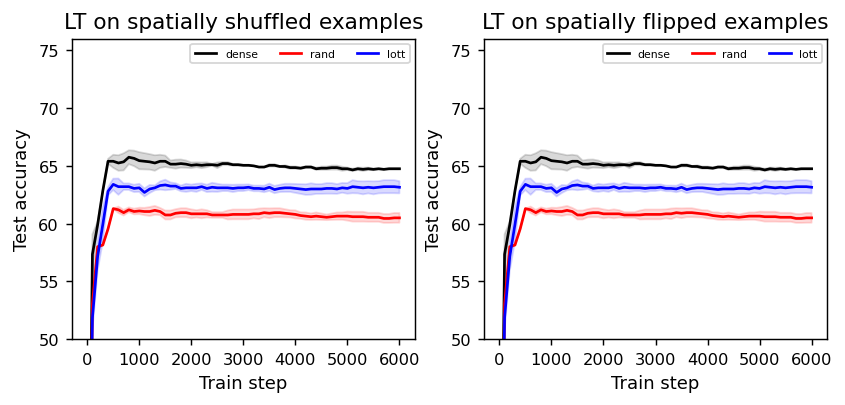

In [ ]:
def plot_results(ax, title, results, x):
    ax.set_title(title)
    for label, color in zip(['dense', 'rand', 'lott'], ['k', 'r', 'b']):
        y, y_err = average_over_results(results, label)
        ax.plot(x, y, color=color, label=label)
        ax.fill_between(x, y - y_err, y + y_err, color=color, alpha=0.15)
    ax.set_ylim(50, 76)
    ax.set_ylabel('Test accuracy')
    ax.set_xlabel("Train step")
    ax.tick_params(axis='both', labelsize=9)
    ax.legend(fontsize=6, ncol=3)

fig = plt.figure(figsize=(7.5, 3), dpi=130)
x = range(0, model_args.total_steps + 1, model_args.eval_every)

# Plot for spatially shuffled examples
ax1 = plt.subplot(1, 2, 1)
plot_results(ax1, 'LT on spatially shuffled examples', results_shuff, x)

# Plot for spatially flipped examples
ax2 = plt.subplot(1, 2, 2)
plot_results(ax2, 'LT on spatially flipped examples', results_flip, x)

plt.show()

It seems no difference, great!

# Deep Double Discent Phenomenon

In [ ]:
import pylab as plt
import numpy as np
import pickle
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [ ]:

from mnist1d.data import make_dataset, get_dataset_args

args = get_dataset_args()
args.num_samples = 16_000
args.train_split = 0.25

data = make_dataset(args)

print(data['x'].shape)
print(data['x_test'].shape)

(4000, 40)
(12000, 40)


In [ ]:
# Adding 0.15 label noise to training labels
import copy
data_with_label_noise = copy.deepcopy(data)

for i in range(len(data['y'])):
    if np.random.random_sample() < 0.15:
        data_with_label_noise['y'][i] = np.random.randint(0, 10)

In [ ]:
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [ ]:
def fit_model(model, data, n_epoch=500):
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    x_train = torch.tensor(data["x"].astype("float32"))
    y_train = torch.tensor(data["y"].astype("long"))
    x_test = torch.tensor(data["x_test"].astype("float32"))
    y_test = torch.tensor(data["y_test"].astype("long"))

    data_loader = DataLoader(
        TensorDataset(x_train, y_train),
        batch_size=100,
        shuffle=True
    )

    for epoch in range(n_epoch):
        for i, (x_batch, y_batch) in enumerate(data_loader):
            optimizer.zero_grad()
            pred = model(x_batch)
            loss = loss_function(pred, y_batch)
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            pred_train = model(x_train)
            pred_test = model(x_test)

            _, predicted_train_class = torch.max(pred_train.data, 1)
            _, predicted_test_class = torch.max(pred_test.data, 1)

            errors_train = 100 * (predicted_train_class != y_train).float().mean()
            errors_test = 100 * (predicted_test_class != y_test).float().mean()
            losses_train = loss_function(pred_train, y_train).item()
            losses_test = loss_function(pred_test, y_test).item()

            print(
                f"Epoch {epoch + 1:5d}, "
                f"Train Loss: {losses_train:.6f}, Train Error: {errors_train:3.2f}%, "
                f"Test Loss: {losses_test:.6f}, Test Error: {errors_test:3.2f}%"
            )

    return errors_train, errors_test

In [ ]:
# training without label noise
hidden_variables = np.unique(np.geomspace(2, 200, 20, dtype=int))

errors_train_raw = np.zeros_like(hidden_variables)
errors_test_raw = np.zeros_like(hidden_variables)

for i, size in enumerate(hidden_variables):
    print(f'Training model with {size:3d} hidden variables')

    model = SimpleMLP(40, size, 10)
    errors_train, errors_test = fit_model(model, data)
    errors_train_raw[i] = errors_train
    errors_test_raw[i] = errors_test

Streaming output truncated to the last 5000 lines.
Epoch    10, Train Loss: 1.554936, Train Error: 60.75%, Test Loss: 1.605544, Test Error: 64.17%
Epoch    11, Train Loss: 1.517588, Train Error: 60.35%, Test Loss: 1.571585, Test Error: 63.56%
Epoch    12, Train Loss: 1.482337, Train Error: 57.85%, Test Loss: 1.539772, Test Error: 61.33%
Epoch    13, Train Loss: 1.442357, Train Error: 56.38%, Test Loss: 1.507218, Test Error: 60.38%
Epoch    14, Train Loss: 1.408136, Train Error: 55.40%, Test Loss: 1.474981, Test Error: 58.72%
Epoch    15, Train Loss: 1.377150, Train Error: 54.35%, Test Loss: 1.445278, Test Error: 57.95%
Epoch    16, Train Loss: 1.352509, Train Error: 53.03%, Test Loss: 1.421649, Test Error: 56.65%
Epoch    17, Train Loss: 1.328442, Train Error: 52.03%, Test Loss: 1.398014, Test Error: 56.17%
Epoch    18, Train Loss: 1.306080, Train Error: 50.40%, Test Loss: 1.382565, Test Error: 54.91%
Epoch    19, Train Loss: 1.291651, Train Error: 50.42%, Test Loss: 1.370341, Test Err

In [ ]:
# training with label noise
hidden_variables = np.unique(np.geomspace(2, 200, 20, dtype=int))

errors_train_raw = np.zeros_like(hidden_variables)
errors_test_raw = np.zeros_like(hidden_variables)

for i, size in enumerate(hidden_variables):
    print(f'Training model with {size:3d} hidden variables')

    model = SimpleMLP(40, size, 10)
    errors_train, errors_test = fit_model(model, data_with_label_noise)
    errors_train_raw[i] = errors_train
    errors_test_raw[i] = errors_test

Streaming output truncated to the last 5000 lines.
Epoch    10, Train Loss: 1.876170, Train Error: 69.97%, Test Loss: 1.749542, Test Error: 68.99%
Epoch    11, Train Loss: 1.859078, Train Error: 68.43%, Test Loss: 1.730215, Test Error: 67.57%
Epoch    12, Train Loss: 1.841109, Train Error: 65.57%, Test Loss: 1.711867, Test Error: 65.55%
Epoch    13, Train Loss: 1.823715, Train Error: 67.83%, Test Loss: 1.688006, Test Error: 66.86%
Epoch    14, Train Loss: 1.803314, Train Error: 64.90%, Test Loss: 1.665432, Test Error: 64.15%
Epoch    15, Train Loss: 1.785951, Train Error: 64.53%, Test Loss: 1.645279, Test Error: 63.58%
Epoch    16, Train Loss: 1.779721, Train Error: 63.10%, Test Loss: 1.640094, Test Error: 62.63%
Epoch    17, Train Loss: 1.759049, Train Error: 61.90%, Test Loss: 1.609274, Test Error: 61.08%
Epoch    18, Train Loss: 1.746006, Train Error: 62.48%, Test Loss: 1.591559, Test Error: 62.08%
Epoch    19, Train Loss: 1.730285, Train Error: 61.80%, Test Loss: 1.565472, Test Err

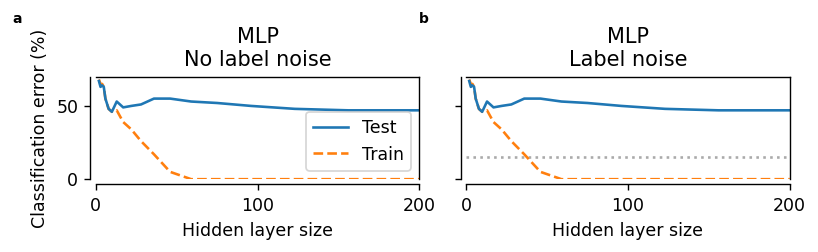

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(6.5, 2), dpi=125)

# Plot for MLP without label noise
axs[0].plot(hidden_variables, errors_test_raw, '-', label='Test')
axs[0].plot(hidden_variables, errors_train_raw, '--', label='Train', zorder=0)

axs[0].set_ylim(0, 70)
axs[0].set_xlim(0, 200)
axs[0].set_xticks([0, 100, 200])
axs[0].set_xlabel('Hidden layer size')
axs[0].set_ylabel('Classification error (%)')
axs[0].legend()
axs[0].set_title('MLP\nNo label noise')

axs[0].spines.left.set_position(('outward', 3))
axs[0].spines.bottom.set_position(('outward', 3))

# Plot for MLP with label noise
axs[1].plot(hidden_variables, errors_test_raw, '-', label='Test')
axs[1].plot(hidden_variables, errors_train_raw, '--', label='Train', zorder=0)

axs[1].set_ylim(0, 70)
axs[1].set_xlim(0, 200)
axs[1].set_xticks([0, 100, 200])
axs[1].set_xlabel('Hidden layer size')
axs[1].set_yticklabels([])
axs[1].set_title('MLP\nLabel noise')
axs[1].plot([0, 300], [15, 15], ':', zorder=-1, color='#aaaaaa')

axs[1].spines.left.set_position(('outward', 3))
axs[1].spines.bottom.set_position(('outward', 3))

# Adding figure labels
fig.text(0, .94, 'a', fontsize=8, weight='bold')
fig.text(.5, .94, 'b', fontsize=8, weight='bold')

plt.tight_layout()
plt.show()


As you can see the phenmenon of deep double descent is visible clearly, as the layer size is incresing, the loss first decreases then increases again after decreases and goes on.
They look quite similar, maybe the differnce will be visible if we increase the noise level.

# Metalearning: learning rate

In [ ]:
args = mnist1d.get_dataset_args()
data = mnist1d.get_dataset(args=args)

Saving to ./mnist1d_data.pkl
Successfully loaded data from ./mnist1d_data.pkl


In [ ]:
def get_functional_mlp(args):
  D, H, O = args.input_size, args.hidden_size, args.output_size
  linear1, linear2 = torch.nn.Linear(D,H), torch.nn.Linear(H,O)
  params = [linear1.weight, linear1.bias, linear2.weight, linear2.bias]
  params = [torch.Tensor(p.reshape(-1)) for p in params]
  param_vec = torch.cat(params)

  def forward_fn(x, param_vec):
    pointer = 0
    W1 = param_vec[pointer:pointer+D*H].reshape(H,D)
    pointer += D*H
    b1 = param_vec[pointer:pointer+H].reshape(1,-1)
    pointer += H
    W2 = param_vec[pointer:pointer+H*O].reshape(O,H)
    pointer += O*H
    b2 = param_vec[pointer:pointer+O].reshape(1,-1)

    h = torch.tanh((W1 @ x.t()).t() + b1)
    logits = (W2 @ h.t()).t() + b2
    return logits
  return param_vec, forward_fn

In [ ]:
def inner_optimization(learning_rate, model, args, data):
  torch.manual_seed(args.seed)
  (param_vec, fwd_fn) = model
  x_train, x_test = torch.Tensor(data['x']), torch.Tensor(data['x_test'])
  y_train, y_test = torch.LongTensor(data['y']), torch.LongTensor(data['y_test'])

  criterion = torch.nn.CrossEntropyLoss()
  results = {'train_losses': []}
  for step in range(args.total_steps):
    bix = (args.batch_ix + (step*args.batch_size))%len(x_train)
    x, y = x_train[bix:bix+args.batch_size], y_train[bix:bix+args.batch_size]
    loss = criterion(fwd_fn(x,param_vec), y)
    grads = torch.autograd.grad(loss, param_vec, retain_graph=True, create_graph=True)[0]
    param_vec = param_vec - learning_rate * grads
    results['train_losses'].append(loss)

  results['train_losses'] = torch.stack(results['train_losses'])
  return results

This function implements gradient-based metalearning, where the outer optimization step updates the inner learning rate by backpropagating through the unrolled optimization loop, as described in the Maclaurin et al., 2015 paper

In [ ]:
def outer_optimization(inner_args, outer_args):
  torch.manual_seed(outer_args.seed)

  inner_model = get_functional_mlp(inner_args)
  np_inner_lr = np.asarray([inner_args.initial_lr])
  inner_lr = Variable( torch.FloatTensor(np_inner_lr), requires_grad=True)

  results = {'all_losses':[], 'train_losses':[], 'inner_lr':[]}
  t0 = time.time()
  for step in range(outer_args.total_steps):

    inner_results = inner_optimization(inner_lr, inner_model, inner_args, data)

    outer_loss = inner_results['train_losses'].mean()
    outer_grads = torch.autograd.grad(outer_loss, inner_lr)[0]
    inner_lr = inner_lr - outer_args.learning_rate * outer_grads

    results['train_losses'].append(outer_loss.item())
    results['inner_lr'].append(inner_lr.item())
    results['all_losses'].append(inner_results['train_losses'].detach().cpu().numpy())
    if step > 0 and step % outer_args.print_every == 0: # print out training progress
      t1 = time.time()
      print("step: {}, dt: {:.3e}s, mean_inner_loss: {:.3e}, final_inner_loss: {:.3e}, inner_lr: {:.3e}"
          .format(step, t1-t0, results['train_losses'][-1], inner_results['train_losses'][-1], results['inner_lr'][-1]))
      t0 = t1

  return results

In [ ]:
class ObjectView(object):
    def __init__(self, d): self.__dict__ = d

def get_inner_args(as_dict=False):
  arg_dict = {'input_size': 40,
              'hidden_size': 50,
              'output_size': 10,
              'batch_size': 50,
              'total_steps': 200,
              'initial_lr': 1e-2,
              'seed': 0,
              'batch_ix': 0}
  return arg_dict if as_dict else ObjectView(arg_dict)

def get_outer_args(as_dict=False):
  arg_dict = {'batch_size': 1,
              'learning_rate': 3e-1,
              'total_steps': 50,
              'print_every': 3,
              'seed': 0}
  return arg_dict if as_dict else ObjectView(arg_dict)

Let's define two learning rate for two different process, if both processess converge to similar learning rate then we get our learning rate

In [ ]:
inner_args, outer_args = get_inner_args(), get_outer_args()
inner_args.initial_lr = 1.5
results_trial1 = outer_optimization(inner_args, outer_args)

print()

inner_args, outer_args = get_inner_args(), get_outer_args()
inner_args.initial_lr = 1.5e-1
results_trial2 = outer_optimization(inner_args, outer_args)

step: 3, dt: 1.362e+00s, mean_inner_loss: 1.808e+00, final_inner_loss: 1.588e+00, inner_lr: 1.259e+00
step: 6, dt: 1.031e+00s, mean_inner_loss: 1.762e+00, final_inner_loss: 1.508e+00, inner_lr: 1.044e+00
step: 9, dt: 1.019e+00s, mean_inner_loss: 1.737e+00, final_inner_loss: 1.500e+00, inner_lr: 9.111e-01
step: 12, dt: 1.033e+00s, mean_inner_loss: 1.726e+00, final_inner_loss: 1.491e+00, inner_lr: 8.209e-01
step: 15, dt: 1.035e+00s, mean_inner_loss: 1.721e+00, final_inner_loss: 1.484e+00, inner_lr: 7.606e-01
step: 18, dt: 1.029e+00s, mean_inner_loss: 1.718e+00, final_inner_loss: 1.485e+00, inner_lr: 7.205e-01
step: 21, dt: 1.036e+00s, mean_inner_loss: 1.717e+00, final_inner_loss: 1.488e+00, inner_lr: 6.931e-01
step: 24, dt: 1.417e+00s, mean_inner_loss: 1.717e+00, final_inner_loss: 1.492e+00, inner_lr: 6.735e-01
step: 27, dt: 2.608e+00s, mean_inner_loss: 1.717e+00, final_inner_loss: 1.495e+00, inner_lr: 6.590e-01
step: 30, dt: 1.047e+00s, mean_inner_loss: 1.716e+00, final_inner_loss: 1.49

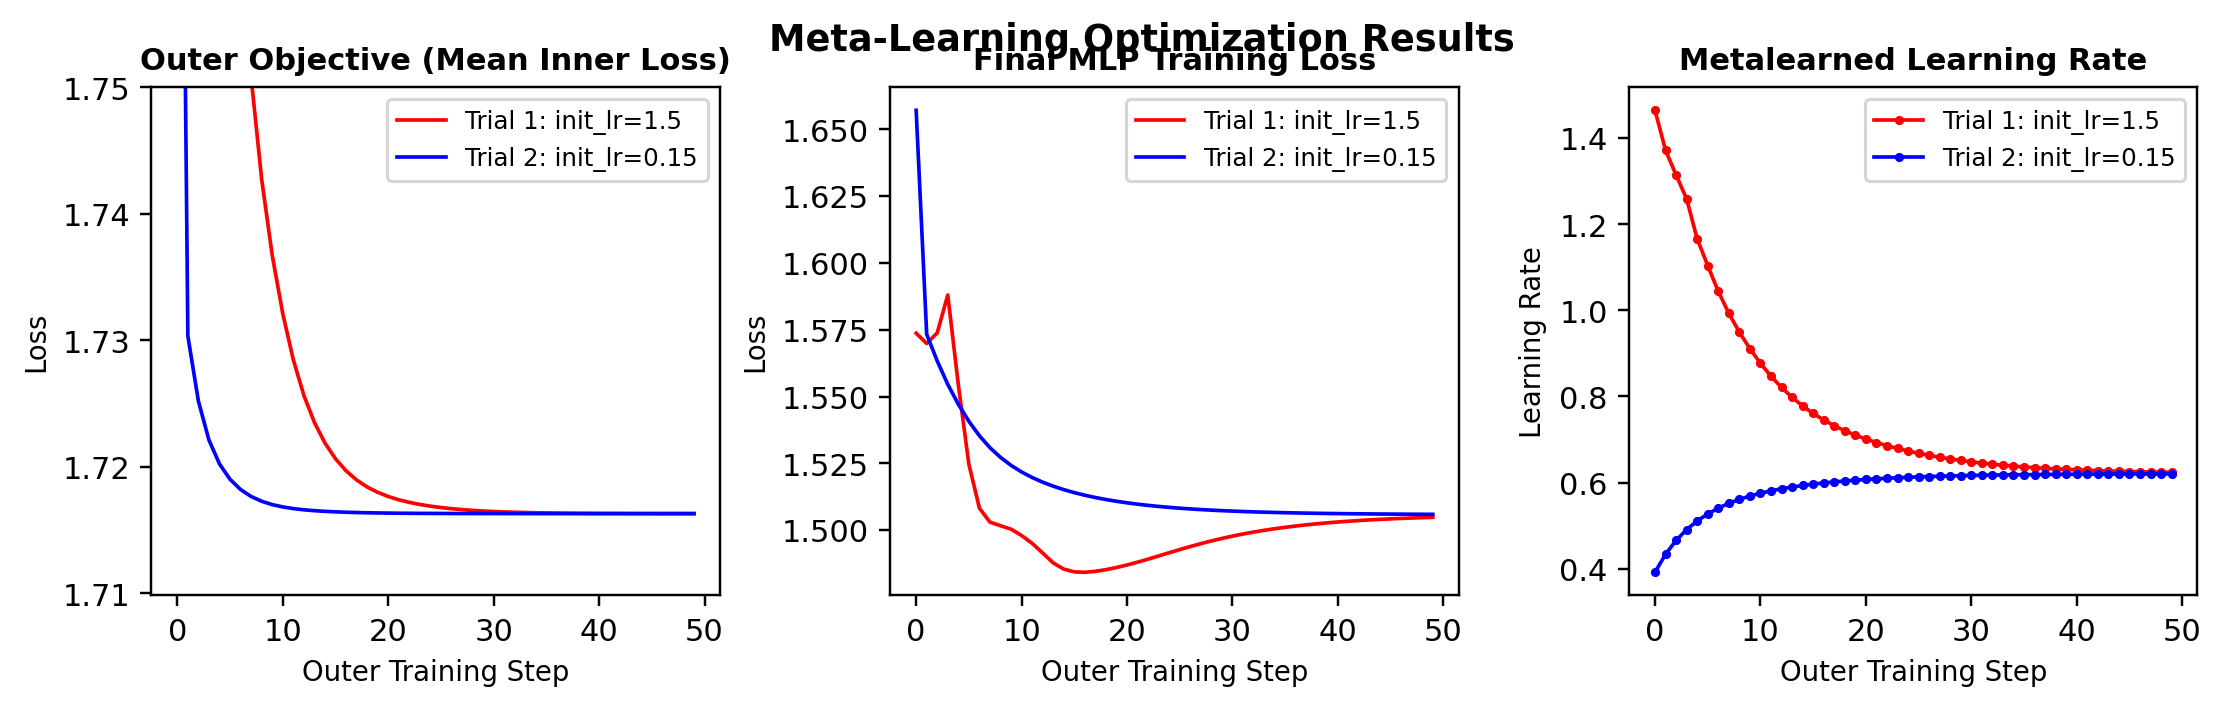

In [ ]:
fig = plt.figure(figsize=(12, 3), dpi=220)
fig.suptitle("Meta-Learning Optimization Results", fontsize=12, weight='bold')

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(1, 3, 1)
plt.plot(results_trial1['train_losses'], 'r-', linewidth=1.2, label='Trial 1: init_lr=1.5')
plt.plot(results_trial2['train_losses'], 'b-', linewidth=1.2, label='Trial 2: init_lr=0.15')
plt.title('Outer Objective (Mean Inner Loss)', fontsize=10, weight='bold')
plt.xlabel("Outer Training Step", fontsize=9)
plt.ylabel("Loss", fontsize=9)
plt.ylim(None, 1.75)
plt.legend(fontsize=8, loc='upper right')

plt.subplot(1, 3, 2)
plt.plot([r[-1] for r in results_trial1['all_losses']], 'r-', linewidth=1.2, label='Trial 1: init_lr=1.5')
plt.plot([r[-1] for r in results_trial2['all_losses']], 'b-', linewidth=1.2, label='Trial 2: init_lr=0.15')
plt.title('Final MLP Training Loss', fontsize=10, weight='bold')
plt.xlabel("Outer Training Step", fontsize=9)
plt.ylabel("Loss", fontsize=9)
plt.legend(fontsize=8, loc='upper right')

plt.subplot(1, 3, 3)
plt.plot(results_trial1['inner_lr'], 'r.-', markersize=4, linewidth=1.2, label='Trial 1: init_lr=1.5')
plt.plot(results_trial2['inner_lr'], 'b.-', markersize=4, linewidth=1.2, label='Trial 2: init_lr=0.15')
plt.title('Metalearned Learning Rate', fontsize=10, weight='bold')
plt.xlabel("Outer Training Step", fontsize=9)
plt.ylabel("Learning Rate", fontsize=9)
plt.legend(fontsize=8, loc='upper right')

plt.show()


# Metalearning Activation function

In [ ]:
args = mnist1d.get_dataset_args()
args.num_samples = 10000
data = mnist1d.get_dataset(args=args, download=False, regenerate=True)
print("Examples in training set: {}".format(len(data['y'])))
print("Examples in test set: {}".format(len(data['y_test'])))
print("Length of each input: {}".format(data['x'].shape[-1]))
print("Number of classes: {}".format(len(data['templates']['y'])))

Did or could not load data from ./mnist1d_data.pkl. Rebuilding dataset...
Examples in training set: 8000
Examples in test set: 2000
Length of each input: 40
Number of classes: 10


In [ ]:
DEVICE = str(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

In [ ]:
def get_functional_mlp(args):
  D, H, O = args.input_size, args.hidden_size, args.output_size
  linear1, linear2 = torch.nn.Linear(D,H), torch.nn.Linear(H,O)
  params = [linear1.weight, linear1.bias, linear2.weight, linear2.bias]
  params = [torch.Tensor(p.reshape(-1)) for p in params]
  param_vec = torch.cat(params).to(args.device)

  def forward_fn(x, param_vec, afunc):
    pointer = 0
    W1 = param_vec[pointer:pointer+D*H].reshape(H,D)
    pointer += D*H
    b1 = param_vec[pointer:pointer+H].reshape(1,-1)
    pointer += H
    W2 = param_vec[pointer:pointer+H*O].reshape(O,H)
    pointer += O*H
    b2 = param_vec[pointer:pointer+O].reshape(1,-1)

    h = afunc((W1 @ x.t()).t() + b1)
    h = h + .1*(2*torch.rand(*b1.shape).to(b1.device)-1)
    logits = (W2 @ h.t()).t() + b2
    return logits
  return param_vec, forward_fn

In [ ]:
def accuracy(model, inputs, targets):
  preds = model(inputs).argmax(-1).cpu().numpy()
  targets = targets.cpu().numpy().astype(np.float32)
  return 100*sum(preds==targets)/len(targets)

def inner_optimization(model, args, data, afunc):
  torch.manual_seed(args.seed)
  (param_vec, fwd_fn) = model
  x_train, x_test = torch.Tensor(data['x']), torch.Tensor(data['x_test'])
  y_train, y_test = torch.LongTensor(data['y']), torch.LongTensor(data['y_test'])
  x_train, x_test, y_train, y_test = [v.to(args.device) for v in [x_train, x_test, y_train, y_test]]

  criterion = torch.nn.CrossEntropyLoss()
  results = {'train_losses': [], 'test_acc': []}
  avg_sq_grad = torch.ones_like(param_vec)

  for step in range(args.total_steps):
    bix = (args.batch_ix + (step*args.batch_size))%len(x_train)
    x, y = x_train[bix:bix+args.batch_size], y_train[bix:bix+args.batch_size]
    loss = criterion(fwd_fn(x, param_vec, afunc), y)

    grads = torch.autograd.grad(loss, param_vec, retain_graph=True, create_graph=True)[0]
    avg_sq_grad = avg_sq_grad * args.mu + grads**2 * (1 - args.mu)
    param_vec = param_vec - args.learning_rate * grads/(torch.sqrt(avg_sq_grad) + 1e-8)

    results['train_losses'].append(loss)
    if step % args.test_every:
      k = 500
      test_acc = accuracy(lambda x: fwd_fn(x, param_vec, afunc), x_test[:k], y_test[:k])
      results['test_acc'].append(test_acc)

  results['train_losses'] = torch.stack(results['train_losses'])
  results['test_acc'] = np.asarray(results['test_acc'])
  return results

In [ ]:
base_activation = torch.nn.ELU()

def mlp_afunc(model, x):
  (param_vec, fwd_fn) = model
  x_hat = 0.2 * fwd_fn(x.reshape(-1, 1), param_vec, torch.tanh)
  x_hat = x_hat.reshape(*x.shape)
  return base_activation(x) + x_hat

def outer_optimization(inner_args, outer_args):
  torch.manual_seed(outer_args.seed)
  torch.cuda.manual_seed_all(outer_args.seed)
  (outer_param_vec, outer_fwd_fn) = outer_model = get_functional_mlp(outer_args)

  t0 = time.time()
  results = {'inner_test_accs':[], 'train_losses':[], 'inner_afunc':[], 'grad_norm':[]}
  momentum = torch.zeros_like(outer_param_vec)
  for step in range(outer_args.total_steps):
    inner_afunc = lambda x: mlp_afunc(outer_model, x)
    inner_model = get_functional_mlp(inner_args)
    inner_results = inner_optimization(inner_model, inner_args, data, inner_afunc)

    (outer_param_vec, outer_fwd_fn) = outer_model
    outer_loss = inner_results['train_losses'][-200:].mean()
    outer_grads = torch.autograd.grad(outer_loss, outer_param_vec)[0]
    outer_grads = outer_grads.clamp(-1e-1, 1e-1)

    momentum = outer_args.mu * momentum + outer_grads
    outer_param_vec = outer_param_vec - outer_args.learning_rate * momentum
    outer_model = (outer_param_vec, outer_fwd_fn)

    results['train_losses'].append(outer_loss.item())
    if step % outer_args.print_every == 0:
      t1 = time.time()
      grad_norm = outer_grads @ outer_grads
      results['grad_norm'].append(grad_norm.item())
      print('step: {}, dt: {:.1f}s, meta_grad_norm: {:.1e}, mean_inner_loss: {:.3e}, final_inner_loss: {:.3e}, test_acc: {:.1f}'
          .format(step, t1-t0, grad_norm.item(),
                  results['train_losses'][-1],
                  inner_results['train_losses'][-1],
                  inner_results['test_acc'][-1]))
      t0 = t1

    x_fn = torch.linspace(-5,5,steps=100).to(outer_args.device)
    x_fn, y_fn = x_fn.cpu().numpy(), inner_afunc(x_fn).detach().cpu().numpy()
    results['inner_afunc'].append([x_fn, y_fn])
    results['inner_test_accs'].append(inner_results['test_acc'])

  return results

In [ ]:
class ObjectView(object):
    def __init__(self, d): self.__dict__ = d

def get_inner_args(as_dict=False):
  arg_dict = {'input_size': 40,
              'hidden_size': 128,
              'output_size': 10,
              'batch_size': 100,
              'total_steps': 301,
              'test_every': 400,
              'learning_rate': 1e-2,
              'seed': 0,
              'device': DEVICE,
              'mu': 0.4,
              'batch_ix': 0}
  return arg_dict if as_dict else ObjectView(arg_dict)

def get_outer_args(as_dict=False):
  arg_dict = {'input_size': 1,
              'hidden_size': 100,
              'output_size': 1,
              'batch_size': 1,
              'learning_rate': 3e-1,
              'mu': 0.0,
              'total_steps': 301,
              'print_every': 1,
              'device': DEVICE,
              'seed': 0}
  return arg_dict if as_dict else ObjectView(arg_dict)

inner_args, outer_args = get_inner_args(), get_outer_args()
mnist1d.set_seed(outer_args.seed)
results = outer_optimization(inner_args, outer_args)

step: 0, dt: 1.9s, meta_grad_norm: 5.2e-02, mean_inner_loss: 1.352e+00, final_inner_loss: 1.353e+00, test_acc: 48.6
step: 1, dt: 1.8s, meta_grad_norm: 9.1e-02, mean_inner_loss: 1.314e+00, final_inner_loss: 1.283e+00, test_acc: 50.4
step: 2, dt: 1.8s, meta_grad_norm: 1.1e-01, mean_inner_loss: 1.283e+00, final_inner_loss: 1.248e+00, test_acc: 52.6
step: 3, dt: 1.8s, meta_grad_norm: 1.2e-01, mean_inner_loss: 1.249e+00, final_inner_loss: 1.205e+00, test_acc: 56.0
step: 4, dt: 1.8s, meta_grad_norm: 1.4e-01, mean_inner_loss: 1.211e+00, final_inner_loss: 1.154e+00, test_acc: 57.8
step: 5, dt: 2.0s, meta_grad_norm: 1.2e-01, mean_inner_loss: 1.170e+00, final_inner_loss: 1.087e+00, test_acc: 59.6
step: 6, dt: 2.2s, meta_grad_norm: 1.2e-01, mean_inner_loss: 1.132e+00, final_inner_loss: 1.049e+00, test_acc: 58.8
step: 7, dt: 1.8s, meta_grad_norm: 1.3e-01, mean_inner_loss: 1.094e+00, final_inner_loss: 1.022e+00, test_acc: 61.2
step: 8, dt: 1.8s, meta_grad_norm: 6.4e-02, mean_inner_loss: 1.059e+00, 

In [ ]:
afuncs = [torch.relu, lambda x: x * torch.sigmoid(x), torch.nn.ELU(),
          torch.nn.Softplus(), torch.tanh, torch.sigmoid]
afunc_names = ['relu', 'swish', 'elu', 'softplus', 'tanh', 'sigmoid']
afunc_colors = ['yellow', 'orange', 'red', 'purple', 'blue', 'green']

baseline_results = []
results['baselines'] = []

for i, f in enumerate(afuncs):
    torch.manual_seed(inner_args.seed)
    inner_model = get_functional_mlp(inner_args)
    r = inner_optimization(inner_model, inner_args, data, afunc=f)
    baseline_results.append(r)
    results['baselines'] += [(afunc_names[i], r['test_acc'][-1], afunc_colors[i])]

In [ ]:
print(np.mean(results['train_losses']))
print(afunc_names)
[r['train_losses'].detach().cpu().numpy().mean() for r in baseline_results]

0.9313880411097377
['relu', 'swish', 'elu', 'softplus', 'tanh', 'sigmoid']


[1.3369017, 1.3675405, 1.4736847, 1.6467019, 1.5242594, 1.7532207]

In [ ]:
# saving
run_tag = 'steps{:.0f}_seed{:.0f}_lr{:.0e}_elu_init' \
        .format(outer_args.total_steps, outer_args.seed,
                outer_args.learning_rate)
mnist1d.to_pickle(results, path='/content' + run_tag)
print('saved: {}'.format(run_tag))

saved: steps301_seed0_lr3e-01_elu_init


In [ ]:
# loading
run_tag = run_tag
results = mnist1d.from_pickle(path='/content' + run_tag)
print('loaded: {}'.format(run_tag))

loaded: steps301_seed0_lr3e-01_elu_init


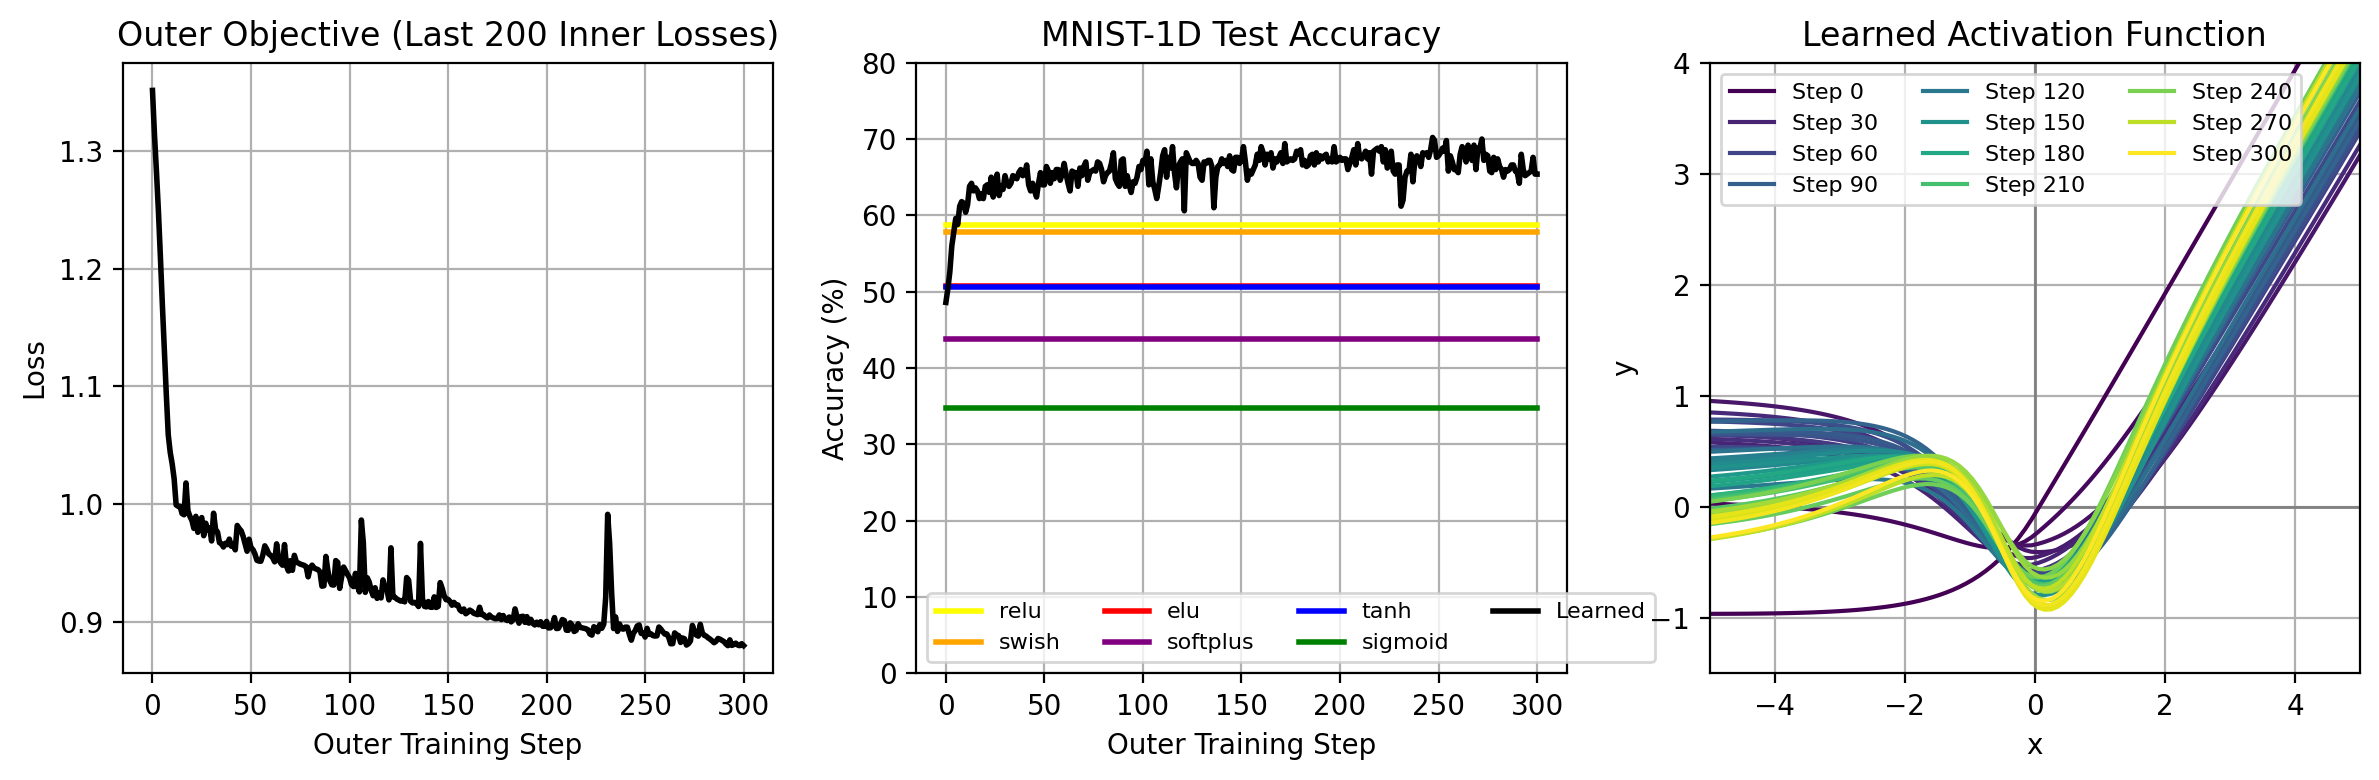

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 4), dpi=200)
t = range(0, outer_args.total_steps, outer_args.print_every)

# Subplot 1: Outer objective (last 200 inner losses)
plt.subplot(1, 3, 1)
plt.plot(results['train_losses'], 'k-', label='Final Training Loss', linewidth=2)
plt.title('Outer Objective (Last 200 Inner Losses)', fontsize=12)
plt.xlabel("Outer Training Step", fontsize=10)
plt.ylabel("Loss", fontsize=10)
plt.grid(True)
plt.tight_layout()

# Subplot 2: MNIST-1D test accuracy
plt.subplot(1, 3, 2)
meta_test_acc = [r[-1] for r in results['inner_test_accs']]
for (name, acc, color) in results['baselines']:
    plt.plot(t, [acc] * len(t), '-', color=color, label=name, linewidth=2)
plt.plot(t, meta_test_acc, 'k-', label='Learned', linewidth=2)
plt.title('MNIST-1D Test Accuracy', fontsize=12)
plt.xlabel("Outer Training Step", fontsize=10)
plt.ylabel("Accuracy (%)", fontsize=10)
plt.ylim(0, 80)
plt.legend(fontsize=8, ncol=4)
plt.grid(True)

# Subplot 3: Learned activation function
plt.subplot(1, 3, 3)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)

N = len(results['inner_afunc'])
colors = plt.cm.viridis(np.linspace(0, 1, N))
for i, (x, y) in enumerate(results['inner_afunc']):
    if i % (N // 50) == 0 or i == len(results['inner_afunc']):
        l, m = 0, 100
        label = 'Step {}'.format(i * outer_args.print_every) if i % (N // 10) == 0 or i == len(results['inner_afunc']) else None
        plt.plot(x[l:m], y[l:m], color=colors[i], label=label)

plt.legend(fontsize=8, ncol=3)
plt.title("Learned Activation Function", fontsize=12)
plt.xlim(-5, 5)
plt.ylim(-1.5, 4)
plt.xlabel("x", fontsize=10)
plt.ylabel("y", fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()

Approximating the function

In [ ]:
def polyfunc(coeffs):
  def f(x):
    r = 0.*x
    for i, c in enumerate(coeffs[::-1]):
      r += c * x**i
    return r
  return f

def get_approx_afun():
  def f(x):
    seg0, seg1, seg2, seg3, seg4, seg5 = [.15, .9], [-.25, 0.1], [-1.2, -.85], [-.5, -.75], [0.2, -.85], [1.2, -1.4]
    y = (x < -2) * polyfunc(seg0)(x) + \
        (x > -2) * (x < -1) * polyfunc(seg1)(x) + \
        (x > -1) * (x < -0.25) * polyfunc(seg2)(x) + \
        (x > -0.25) * (x < 0.1) * polyfunc(seg3)(x) + \
        (x > 0.1) * (x < .6) * polyfunc(seg4)(x) + \
        (x > .6) * polyfunc(seg5)(x)
    return y
  return f

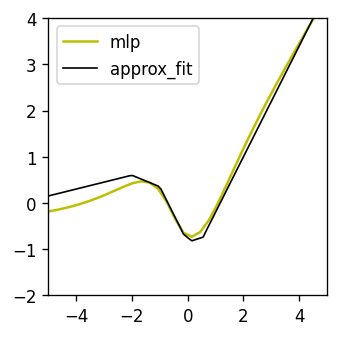

In [ ]:

fig = pl.figure(figsize=[3,3],dpi=120)

approx_afunc = get_approx_afun()
x, y = results['inner_afunc'][-1]
plt.plot(x[::3], y[::3], 'y-', label='mlp')
x_ = np.linspace(-5,5,100)
plt.plot(x_, approx_afunc(x_), 'k-', label='approx_fit', linewidth=1)
plt.legend() ; plt.xlim(-5,5) ; plt.ylim(-2,4) ; plt.show()

In [ ]:
torch.manual_seed(inner_args.seed)
inner_model = get_functional_mlp(inner_args)
poly_results = inner_optimization(inner_model, inner_args, data, afunc=approx_afunc)
results['baselines'] += [('approx_fit', poly_results['test_acc'][-1], 'grey')]
poly_results['test_acc'][-1]

67.4

<ipython-input-50-54d480e99fd6>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x[l:m], y[l:m], 'k-', color=colors[i], label=label)


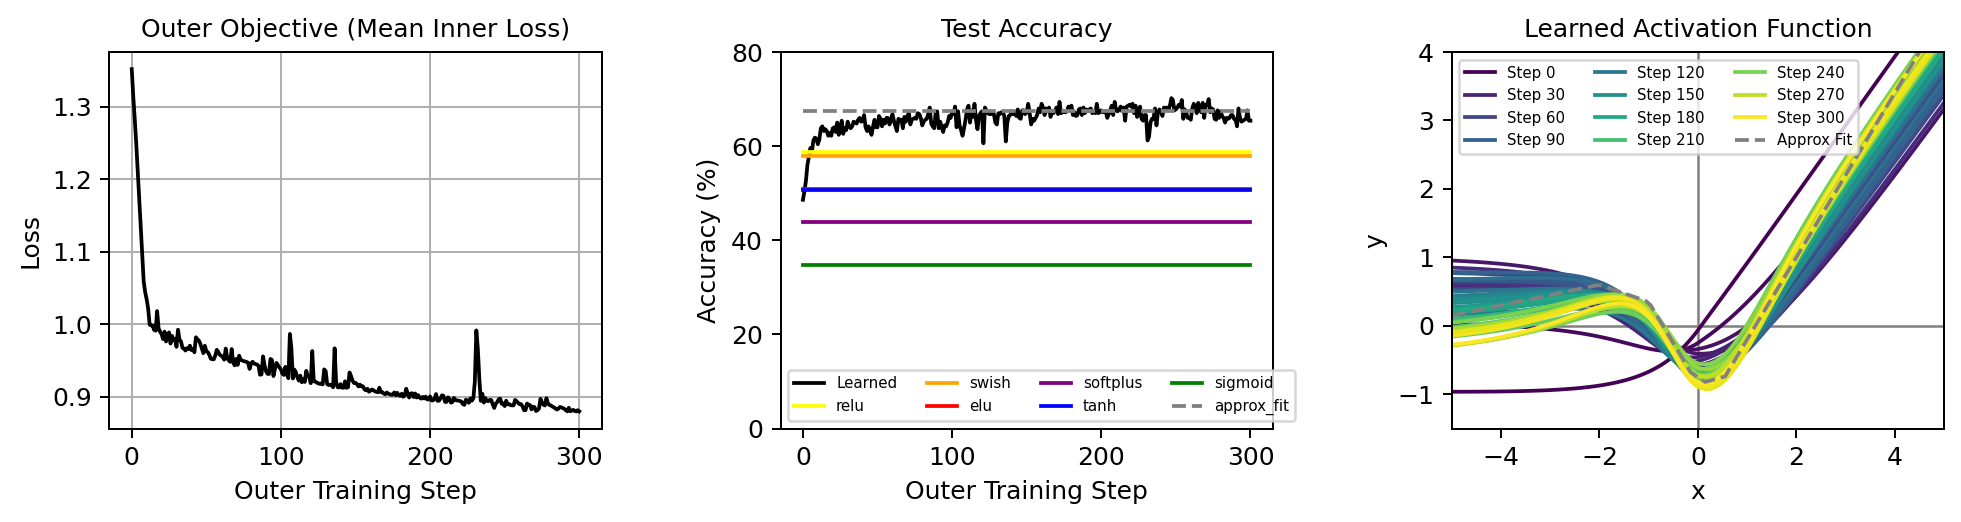

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(11, 3), dpi=180)
t = range(0, outer_args.total_steps, outer_args.print_every)

# Subplot 1: Outer objective (mean inner loss)
plt.subplot(1, 3, 1)
plt.plot(results['train_losses'], 'k-', label='Final Training Loss')
plt.title('Outer Objective (Mean Inner Loss)', fontsize=10)
plt.xlabel("Outer Training Step", fontsize=10)
plt.ylabel("Loss", fontsize=10)
plt.grid(True)

# Subplot 2: Test accuracy
plt.subplot(1, 3, 2)
meta_test_acc = [r[-1] for r in results['inner_test_accs']]
plt.plot(t, meta_test_acc, 'k-', label='Learned')
for (name, acc, color) in results['baselines']:
    line_style = '--' if name == 'approx_fit' else '-'
    plt.plot(t, [acc] * len(t), line_style, color=color, label=name)

plt.title('Test Accuracy', fontsize=10)
plt.xlabel("Outer Training Step", fontsize=10)
plt.ylabel("Accuracy (%)", fontsize=10)
plt.ylim(0, 80)
plt.legend(fontsize=6, ncol=4)

# Subplot 3: Learned activation function
plt.subplot(1, 3, 3)
plt.plot([0, 0], [-6, 6], '-', color='gray', linewidth=1)
plt.plot([-6, 6], [0, 0], '-', color='gray', linewidth=1)

N = len(results['inner_afunc'])
colors = plt.cm.viridis(np.linspace(0, 1, N))
for i, (x, y) in enumerate(results['inner_afunc']):
    if i % (N // 50) == 0 or i == len(results['inner_afunc']):
        l, m = 0, 100
        label = 'Step {}'.format(i * outer_args.print_every) if i % (N // 10) == 0 or i == len(results['inner_afunc']) else None
        plt.plot(x[l:m], y[l:m], 'k-', color=colors[i], label=label)

plt.plot(x[l:m], approx_afun(x[l:m]), '--', color='grey', label='Approx Fit')
plt.legend(fontsize=6, ncol=3)
plt.title("Learned Activation Function", fontsize=10)
plt.xlim(-5, 5)
plt.ylim(-1.5, 4)
plt.xlabel("x", fontsize=10)
plt.ylabel("y", fontsize=10)

plt.tight_layout()
plt.show()

# Self-supervised contrastive learning on MNIST-1D

In [1]:
%matplotlib inline

import pylab as plt
import numpy as np
import torch
import time

from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [12]:
DEVICE = str(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

In [2]:
import random
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

In [3]:
from urllib.request import urlopen
import pickle

url = 'https://github.com/greydanus/mnist1d/raw/master/mnist1d_data.pkl'
data = pickle.load(urlopen(url))

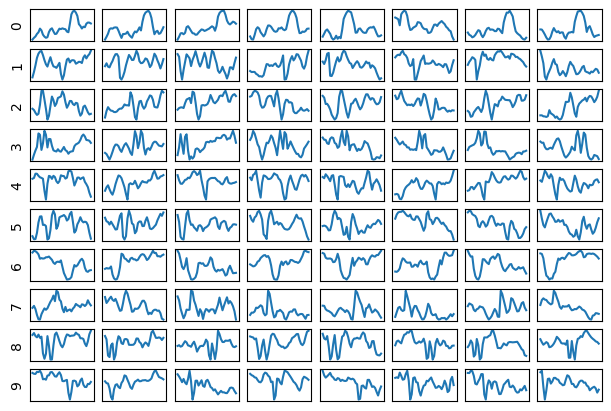

In [4]:
fig, axs = plt.subplots(nrows=10, ncols=8, figsize=(6, 4), layout='constrained')

for y in range(10):
    for i in range(8):
        axs[y, i].plot(data['x'][data['y'] == y][i])
        axs[y, i].set_xticks([])
        axs[y, i].set_yticks([])

    axs[y, 0].set_ylabel(y)

In [13]:
def augment(x, offsets_std=0.3, slopes_std=0.04, maxshift=40, mode='numpy'):
    lib = torch if mode=='pytorch' else np
    n = x.shape[0]

    if mode=='pytorch':
        x_new = x.detach().clone()
    else:
        x_new = x.copy()

    # Subtract offsets
    x_new = x_new - x_new.mean(axis=1, keepdims=True)

    # De-trend
    if mode=='pytorch':
        t = torch.arange(x.shape[1], device=x.device) - (x.shape[1] - 1) / 2
    else:
        t = np.arange(x.shape[1]) - (x.shape[1] - 1) / 2
    slopes = (x * t).sum(axis=1) / (t ** 2).sum()
    x_new -= slopes[:, None] * t

    if maxshift > 0:
        shifts = np.random.randint(0, maxshift, size=(n,))
        for i in range(x.shape[0]):
            x_new[i] = lib.roll(x_new[i], shifts[i])
    if mode=='pytorch':
        slopes = torch.normal(0, slopes_std, size=(n, 1), device=x.device)
        offsets = torch.normal(0, offsets_std, size=(n, 1), device=x.device)
    else:
        slopes = np.random.normal(0, slopes_std, size=(n, 1))
        offsets = np.random.normal(0, offsets_std, size=(n, 1))
    x_new += slopes * t
    x_new += offsets

    return x_new

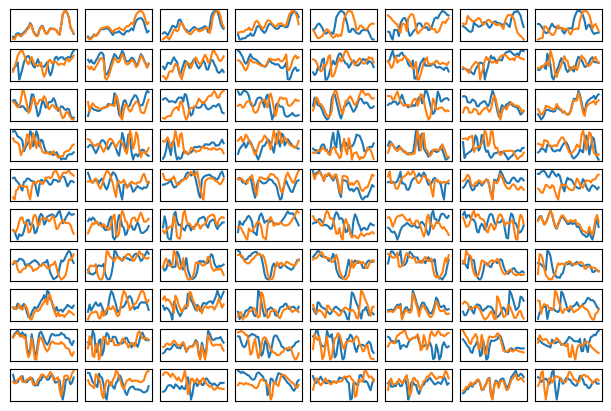

In [14]:
fig, axs = plt.subplots(nrows=10, ncols=8, figsize=(6, 4), layout='constrained')

set_seed(42)

aug_data_1 = augment(data['x'], maxshift=10)
aug_data_2 = augment(data['x'], maxshift=10)

for y in range(10):
    for i in range(8):
        axs[y, i].plot(aug_data_1[data['y'] == y][i])
        axs[y, i].plot(aug_data_2[data['y'] == y][i])
        axs[y, i].set_xticks([])
        axs[y, i].set_yticks([])

In [9]:
class SimCLR(torch.nn.Module):
    def __init__(self, output_dim=16, channels=25, hidden_dim=125, verbose=True):
        super(SimCLR, self).__init__()
        self.conv1 = torch.nn.Conv1d(1, channels, 5, stride=2, padding=1)
        self.conv2 = torch.nn.Conv1d(channels, channels, 3, stride=2, padding=1)
        self.conv3 = torch.nn.Conv1d(channels, channels, 3, stride=2, padding=1)
        self.linear1 = torch.nn.Linear(channels * 5, hidden_dim)   # 125D
        self.linear2 = torch.nn.Linear(hidden_dim, output_dim)

        if verbose:
            print("Initialized CNN with {} parameters".format(self.count_params()))

    def count_params(self):
        return sum([p.view(-1).shape[0] for p in self.parameters()])

    def forward(self, x, projector=True, all_layers=False):
        x = x.view(-1, 1, x.shape[-1])
        h1 = self.conv1(x).relu()
        h2 = self.conv2(h1).relu()
        h3 = self.conv3(h2).relu()
        h3 = h3.view(h3.shape[0], -1)

        if not projector:
            return h3

        p1 = self.linear1(h3).relu()
        p2 = self.linear2(p1)

        if all_layers:
            return [h1.view(h1.shape[0], -1), h2.view(h1.shape[0], -1), h3, p1, p2]

        return p2

In [19]:
def contrastive_train(dataset, model, lr=0.01, n_epochs=100, batch_size=100,
                      tau=0.5, print_every_epoch=10, maxshift=10):

    optimizer = torch.optim.Adam(model.parameters(), lr)

    x = torch.Tensor(dataset['x']).to(DEVICE)
    x_test = torch.Tensor(dataset['x_test']).to(DEVICE)
    model = model.to(DEVICE)

    knn_acc = np.nan
    lin_acc = np.nan

    start_time = time.time()

    for epoch in range(n_epochs):
        total_loss = 0

        # Shuffle the dataset indices for each epoch
        shuffled_indices = np.random.permutation(len(x))

        for batch_idx in range(len(x) // batch_size):
            batch_indices = shuffled_indices[batch_idx * batch_size : (batch_idx + 1) * batch_size]

            # Augment the batch twice
            x_augm1 = augment(x[batch_indices], mode='pytorch', maxshift=maxshift)
            x_augm2 = augment(x[batch_indices], mode='pytorch', maxshift=maxshift)

            # Forward pass through the model for both augmented views
            out1 = model(x_augm1)
            out2 = model(x_augm2)

            # Normalize outputs
            o1 = torch.nn.functional.normalize(out1)
            o2 = torch.nn.functional.normalize(out2)

            # Compute similarity scores and apply softmax
            scores = torch.matmul(o1, o2.T)
            sims = torch.exp(scores / tau)

            # InfoNCE loss function
            loss = torch.mean(-torch.log(torch.diag(sims)) + torch.log(torch.sum(sims, dim=1)))

            total_loss += loss.item()

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Evaluate and print results every specified number of epochs
        if (epoch + 1) % print_every_epoch == 0:
            current_time = time.time()
            mean_loss = total_loss / (len(x) // batch_size)
            mean_time_per_epoch = (current_time - start_time) / print_every_epoch

            # Compute test set classification accuracy using k-NN
            model.eval()
            with torch.no_grad():
                knn_model = KNeighborsClassifier(n_neighbors=10, metric='cosine')
                knn_model.fit(model(x).detach().cpu().numpy(), dataset['y'])
                knn_acc = knn_model.score(model(x_test).detach().cpu().numpy(), dataset['y_test']) * 100

                lin_model = make_pipeline(StandardScaler(), LogisticRegression(tol=1e-2, max_iter=1000))
                lin_model.fit(model(x, projector=False).detach().cpu().numpy(), dataset['y'])
                lin_acc = lin_model.score(model(x_test, projector=False).detach().cpu().numpy(), dataset['y_test']) * 100

            model.train()

            print(f'Epoch {epoch + 1:3d}, Loss per batch: {mean_loss:.2f}, '
                  f'Validation kNN Accuracy Z: {knn_acc:.1f}%, Validation Linear Accuracy H: {lin_acc:.1f}%, '
                  f'Time per epoch: {mean_time_per_epoch:.1f}s')

            start_time = current_time

    return total_loss / (len(x) // batch_size), knn_acc, lin_acc


In [20]:
set_seed(42)

model = SimCLR(output_dim=16)

Z0 = model(torch.Tensor(data['x']).to(DEVICE)).detach().numpy()

contrastive_train(data, model, n_epochs=200, tau=0.5, batch_size=100, maxshift=10)

Z = model(torch.Tensor(data['x']).to(DEVICE)).detach().numpy()
H = model(torch.Tensor(data['x']).to(DEVICE), projector=False).detach().numpy()

Initialized CNN with 21716 parameters
Epoch  10, Loss per batch: 3.11, Validation kNN Accuracy Z: 59.3%, Validation Linear Accuracy H: 70.2%, Time per epoch: 0.6s
Epoch  20, Loss per batch: 3.03, Validation kNN Accuracy Z: 67.1%, Validation Linear Accuracy H: 73.3%, Time per epoch: 0.8s
Epoch  30, Loss per batch: 2.99, Validation kNN Accuracy Z: 71.1%, Validation Linear Accuracy H: 77.3%, Time per epoch: 0.7s
Epoch  40, Loss per batch: 2.98, Validation kNN Accuracy Z: 70.4%, Validation Linear Accuracy H: 75.9%, Time per epoch: 0.8s
Epoch  50, Loss per batch: 2.96, Validation kNN Accuracy Z: 71.0%, Validation Linear Accuracy H: 76.6%, Time per epoch: 0.6s
Epoch  60, Loss per batch: 2.95, Validation kNN Accuracy Z: 70.1%, Validation Linear Accuracy H: 77.2%, Time per epoch: 0.8s
Epoch  70, Loss per batch: 2.93, Validation kNN Accuracy Z: 71.9%, Validation Linear Accuracy H: 76.7%, Time per epoch: 0.7s
Epoch  80, Loss per batch: 2.93, Validation kNN Accuracy Z: 72.3%, Validation Linear Ac

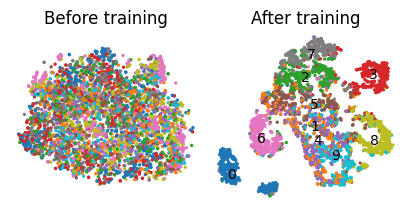

In [21]:
T  = TSNE(metric='cosine', n_jobs=-1).fit_transform(Z)
T0 = TSNE(metric='cosine', n_jobs=-1).fit_transform(Z0)
fig, axs = plt.subplots(ncols=2, figsize=(4, 2), layout='constrained')

axs[0].scatter(T0[:,0], T0[:,1], c=data['y'], s=2, cmap='tab10')
axs[0].set_aspect('equal', 'datalim')
axs[0].set_title('Before training')
axs[0].axis('off')

axs[1].scatter(T[:,0], T[:,1], c=data['y'], s=2, cmap='tab10')
axs[1].set_aspect('equal', 'datalim')
axs[1].set_title('After training')
axs[1].axis('off')

for y in range(10):
    mu = np.median(T[data['y'] == y], axis=0)
    axs[1].text(mu[0], mu[1], y, fontsize=10, ha='center', va='center')

In [22]:
lin = make_pipeline(StandardScaler(), LogisticRegression(tol=1e-2, max_iter=1000))

L_train = model(torch.Tensor(data['x']), all_layers=True)
L_train = [layer.detach().numpy() for layer in L_train]
L_train = [data['x']] + L_train

L_test = model(torch.Tensor(data['x_test']), all_layers=True)
L_test = [layer.detach().numpy() for layer in L_test]
L_test = [data['x_test']] + L_test

accuracy = np.zeros(len(L_train))

for i in range(len(L_train)):
    lin.fit(L_train[i], data['y'])
    accuracy[i] = lin.score(L_test[i], data['y_test']) * 100
    print(f'Layer {i}: linear accuracy {accuracy[i]:.1f}%')


Layer 0: linear accuracy 33.3%
Layer 1: linear accuracy 75.2%
Layer 2: linear accuracy 80.3%
Layer 3: linear accuracy 78.9%
Layer 4: linear accuracy 74.9%
Layer 5: linear accuracy 73.7%


In [23]:
# Model without a projector (only convolutional layers)
class SimCLR_noprojector(torch.nn.Module):
    def __init__(self, output_dim=16, channels=25, hidden_dim=125, verbose=True):
        super(SimCLR_noprojector, self).__init__()
        self.conv1 = torch.nn.Conv1d(1, channels, 5, stride=2, padding=1)
        self.conv2 = torch.nn.Conv1d(channels, channels, 3, stride=2, padding=1)
        self.conv3 = torch.nn.Conv1d(channels, channels, 3, stride=2, padding=1)

        if verbose:
            print("Initialized CNN with {} parameters".format(self.count_params()))

    def count_params(self):
        return sum([p.view(-1).shape[0] for p in self.parameters()])

    def forward(self, x, projector=True, all_layers=False):
        x = x.view(-1, 1, x.shape[-1])
        h1 = self.conv1(x).relu()
        h2 = self.conv2(h1).relu()
        h3 = self.conv3(h2).relu()
        h3 = h3.view(h3.shape[0], -1)

        if all_layers:
            return [h1.view(h1.shape[0], -1), h2.view(h1.shape[0], -1), h3]

        return h3

In [24]:
# Train
set_seed(42)
model_noprojector = SimCLR_noprojector()
contrastive_train(data, model_noprojector, n_epochs=200, tau=0.5, batch_size=100, maxshift=10);

Initialized CNN with 3950 parameters
Epoch  10, Loss per batch: 3.59, Validation kNN Accuracy Z: 41.7%, Validation Linear Accuracy H: 42.2%, Time per epoch: 0.6s
Epoch  20, Loss per batch: 3.51, Validation kNN Accuracy Z: 51.8%, Validation Linear Accuracy H: 52.9%, Time per epoch: 0.6s
Epoch  30, Loss per batch: 3.44, Validation kNN Accuracy Z: 51.6%, Validation Linear Accuracy H: 53.5%, Time per epoch: 0.6s
Epoch  40, Loss per batch: 3.42, Validation kNN Accuracy Z: 50.0%, Validation Linear Accuracy H: 52.2%, Time per epoch: 0.7s
Epoch  50, Loss per batch: 3.40, Validation kNN Accuracy Z: 56.4%, Validation Linear Accuracy H: 53.6%, Time per epoch: 0.6s
Epoch  60, Loss per batch: 3.39, Validation kNN Accuracy Z: 53.8%, Validation Linear Accuracy H: 55.1%, Time per epoch: 0.7s
Epoch  70, Loss per batch: 3.39, Validation kNN Accuracy Z: 53.0%, Validation Linear Accuracy H: 54.3%, Time per epoch: 1.1s
Epoch  80, Loss per batch: 3.39, Validation kNN Accuracy Z: 57.1%, Validation Linear Acc

In [29]:
# Evaluate
lin = make_pipeline(StandardScaler(), LogisticRegression(tol=1e-2, max_iter=1000))

L_train = model_noprojector(torch.Tensor(data['x']), all_layers=True)
L_train = [l.detach().numpy() for l in L_train]
L_train = [data['x']] + L_train

L_test = model_noprojector(torch.Tensor(data['x_test']), all_layers=True)
L_test = [l.detach().numpy() for l in L_test]
L_test = [data['x_test']] + L_test

acc_noprojector = np.zeros(len(L_train))

for i in range(len(L_train)):
    lin.fit(L_train[i], data['y'])
    acc_noprojector[i] = lin.score(L_test[i], data['y_test']) * 100
    print(f'Layer {i}: linear accuracy {acc_noprojector[i]:.1f}')

Layer 0: linear accuracy 33.3
Layer 1: linear accuracy 80.6
Layer 2: linear accuracy 77.3
Layer 3: linear accuracy 59.0


In [25]:
class SimCLR_deepprojector(torch.nn.Module):
    def __init__(self, output_dim=16, channels=25, hidden_dim=125, verbose=True):
        super(SimCLR_deepprojector, self).__init__()
        self.conv1 = torch.nn.Conv1d(1, channels, 5, stride=2, padding=1)
        self.conv2 = torch.nn.Conv1d(channels, channels, 3, stride=2, padding=1)
        self.conv3 = torch.nn.Conv1d(channels, channels, 3, stride=2, padding=1)
        self.linear1 = torch.nn.Linear(channels * 5, hidden_dim)
        self.linear2 = torch.nn.Linear(hidden_dim, hidden_dim)
        self.linear3 = torch.nn.Linear(hidden_dim, hidden_dim)
        self.linear4 = torch.nn.Linear(hidden_dim, output_dim)

        if verbose:
            print("Initialized CNN with {} parameters".format(self.count_params()))

    def count_params(self):
        return sum([p.view(-1).shape[0] for p in self.parameters()])

    def forward(self, x, projector=True, all_layers=False):
        x = x.view(-1, 1, x.shape[-1])
        h1 = self.conv1(x).relu()
        h2 = self.conv2(h1).relu()
        h3 = self.conv3(h2).relu()
        h3 = h3.view(h3.shape[0], -1) # flatten the conv features (125D)

        if not projector:
            return h3

        p1 = self.linear1(h3).relu()
        p2 = self.linear2(p1).relu()
        p3 = self.linear3(p2).relu()
        p4 = self.linear4(p3)

        if all_layers:
            return [h1.view(h1.shape[0], -1), h2.view(h1.shape[0], -1), h3, p1, p2, p3, p4]

        return p4

In [28]:
# Train

set_seed(42)
model_deepprojector = SimCLR_deepprojector()
contrastive_train(data, model_deepprojector, n_epochs=200, tau=0.5, batch_size=100, maxshift=10);

Initialized CNN with 53216 parameters
Epoch  10, Loss per batch: 3.27, Validation kNN Accuracy Z: 28.6%, Validation Linear Accuracy H: 61.9%, Time per epoch: 1.1s
Epoch  20, Loss per batch: 3.10, Validation kNN Accuracy Z: 39.9%, Validation Linear Accuracy H: 64.8%, Time per epoch: 0.7s
Epoch  30, Loss per batch: 3.01, Validation kNN Accuracy Z: 47.5%, Validation Linear Accuracy H: 65.7%, Time per epoch: 0.9s
Epoch  40, Loss per batch: 2.98, Validation kNN Accuracy Z: 46.3%, Validation Linear Accuracy H: 72.1%, Time per epoch: 0.9s
Epoch  50, Loss per batch: 2.96, Validation kNN Accuracy Z: 46.7%, Validation Linear Accuracy H: 73.1%, Time per epoch: 1.1s
Epoch  60, Loss per batch: 2.94, Validation kNN Accuracy Z: 50.3%, Validation Linear Accuracy H: 75.9%, Time per epoch: 0.9s
Epoch  70, Loss per batch: 2.92, Validation kNN Accuracy Z: 50.8%, Validation Linear Accuracy H: 75.8%, Time per epoch: 0.9s
Epoch  80, Loss per batch: 2.92, Validation kNN Accuracy Z: 52.0%, Validation Linear Ac

In [30]:
# Evaluate

lin = make_pipeline(StandardScaler(), LogisticRegression(tol=1e-2, max_iter=1000))

L_train = model_deepprojector(torch.Tensor(data['x']), all_layers=True)
L_train = [l.detach().numpy() for l in L_train]
L_train = [data['x']] + L_train

L_test = model_deepprojector(torch.Tensor(data['x_test']), all_layers=True)
L_test = [l.detach().numpy() for l in L_test]
L_test = [data['x_test']] + L_test

acc_deepprojector = np.zeros(len(L_train))

for i in range(len(L_train)):
    lin.fit(L_train[i], data['y'])
    acc_deepprojector[i] = lin.score(L_test[i], data['y_test']) * 100
    print(f'Layer {i}: linear accuracy {acc_deepprojector[i]:.1f}')

Layer 0: linear accuracy 33.3
Layer 1: linear accuracy 68.9
Layer 2: linear accuracy 75.9
Layer 3: linear accuracy 80.9
Layer 4: linear accuracy 75.3
Layer 5: linear accuracy 71.7
Layer 6: linear accuracy 66.7
Layer 7: linear accuracy 61.9


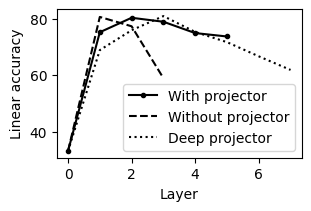

In [32]:
# Plot, for all three models
fig = plt.figure(figsize=(3, 2), layout='constrained')

plt.plot(accuracy, 'k.-', label='With projector')
plt.plot(acc_noprojector, 'k--', label='Without projector')
plt.plot(acc_deepprojector, 'k:', label='Deep projector')
plt.xlabel('Layer')
plt.ylabel('Linear accuracy')
plt.legend();

Text(0.6, 0.94, 'b')

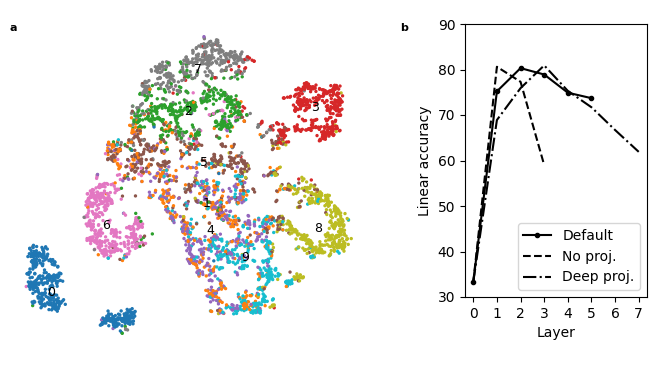

In [36]:
# Final plot

fig = plt.figure(figsize=(6.5, 3.5), layout=None)

axs[0] = plt.axes([0, 0, .55, 1])
axs[1] = plt.axes([.7, .18, .28, .78])

axs[0].scatter(T[:,0], T[:,1], c=data['y'], s=2, cmap='tab10')
axs[0].set_aspect('equal', 'datalim')
axs[0].axis('off')

for y in range(10):
    mu = np.median(T[data['y'] == y], axis=0)
    axs[0].text(mu[0], mu[1], y, fontsize=9, ha='center', va='center')

axs[1].plot(accuracy, 'k.-', label='Default')
axs[1].plot(acc_noprojector, 'k--', markersize=2, label='No proj.')
axs[1].plot(acc_deepprojector, 'k-.', markersize=2, label='Deep proj.')
axs[1].set_xlabel('Layer')
axs[1].set_ylabel('Linear accuracy')
axs[1].set_xticks([0,1,2,3,4,5,6,7])
axs[1].set_ylim([30, 90])
axs[1].legend()

fig.text(0, .94, 'a', fontsize=8, weight='bold')
fig.text(.6, .94, 'b', fontsize=8, weight='bold')